## Get started
### Imports

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib.colors import LogNorm
from os.path import exists, dirname
import os, sys
import numpy as np
import seaborn as sns
import json
from dreem_nap import database, utils
from dreem_nap.study import Study
import yaml

### Configuration
- Load config file and check what's in it
- Configurate the Notebook

In [4]:
with open('../config.yml', 'r') as ymlfile:
    cfg = yaml.safe_load(ymlfile)
for k,v in cfg.items():
    print(k,(30-len(k))*'_',v)

mpl.rcParams['figure.dpi'] = cfg['mpl_rcParams_figure_dpi'] # the highest the resolution, the slowest the plotting
mpl.rcParams["figure.figsize"] = cfg['mpl_rcParams_figure_figsize'] # (width, height) in inches

path __________________________ /Users/ymdt/src/dreem_nap/data/
path_to_data __________________ /Users/ymdt/src/dreem_nap/data/DEMULTIPLEXED
firebase_credentials_file _____ /Users/ymdt/src/dreem_nap/data/credentials_firebase.json
path_to_studies _______________ /Users/ymdt/src/dreem_nap/data/DEMULTIPLEXED/samples.csv
min_cov_bases _________________ 10
mpl_rcParams_figure_dpi _______ 600
mpl_rcParams_figure_figsize ___ [15, 7]


### Load data
Create and load dataframe of a single study as a demo

In [5]:
from dreem_nap.study import Study

# Create a study
salt = Study().from_dict({'name': 'salt',
                         'description': 'Change the Na concentration', 
                         'samples': ['A6', 'B6', 'C6', 'D6', 'E6'], 
                         'title': 'Na quantity [M]', 
                         'conditions': [0.15, 0.3, 0.6, 1.0, 1.2]})

# Load data
salt.load_df_from_local_files(path_to_data= cfg['path_to_data'], 
                              min_cov_bases= cfg['min_cov_bases'])

# Show the dataframe
salt.df.head()

300 constructs found across all samples for study salt.


,samp,construct,sequence,structure,data_type,num_reads,num_aligned,num_of_mutations,mut_bases,info_bases,...,mod_bases_A,mod_bases_C,mod_bases_G,mod_bases_T,ROI_start,ROI_stop,base_pairing_prob,mut_rates,min_cov_bases,cov_bases_roi
0,A6,7695,GACGTTCCTGGATCCTGCATCGAATCTTGATCATATATCTACATCT...,.(()()))).......).(()()))).......).(()())))......,DMS,4017,3424,"[846, 455, 113, 16, 6, 4, 0, 1, 0, 1, 0, 0, 0,...","[0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, ...","[3230.0, 3234.0, 3235.0, 3238.0, 3240.0, 3240....",...,"[0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",0,169,"[0.6262076954790455, 0.43377457736022473, 0.50...","[0.05399379974601576, 0.006054062067011257, 0....",10,154.0
1,A6,2069,GACGTTCCTGGATCCATTGTATATGTCCTTTTTCTCTTCCTCTTTC...,.(()()))).......).(()()))).......).(()())))......,DMS,16059,15518,"[3790, 4658, 1248, 314, 146, 87, 44, 53, 20, 1...","[0.0, 0.0, 0.0, 1.0, 1.0, 2.0, 0.0, 3.0, 1.0, ...","[15467.0, 15477.0, 15490.0, 15500.0, 15502.0, ...",...,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 1.0, 2.0, 0.0, 0.0, 1.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 2.0, 0.0, ...",0,169,"[0.6891782177932253, 0.03904997318201542, 0.75...","[0.07962873963906618, 0.08109858439243944, 0.0...",10,6034.0
2,A6,381,GACGTTCCTGGATCCATTCGATCCAAACACACCCACACTCACACAC...,.(()()))).......).(()()))).......).(()())))......,DMS,32688,15403,"[5279, 3408, 1288, 685, 292, 109, 73, 54, 36, ...","[0.0, 0.0, 0.0, 1.0, 1.0, 0.0, 2.0, 0.0, 0.0, ...","[15344.0, 15350.0, 15365.0, 15377.0, 15382.0, ...",...,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 2.0, 0.0, 0.0, ...",0,169,"[0.8699932291763063, 0.6107760903625812, 0.448...","[0.07407147142222434, 0.016051087241816833, 0....",10,507.0
4,A6,3899,GACGTTCCTGGATCCGCATTCTAAGATTCTTTCTCTTTCTCTTTCT...,.(()()))).......).(()()))).......).(()())))......,DMS,2050,1164,"[241, 104, 18, 11, 4, 2, 1, 7, 8, 9, 0, 0, 0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[1159.0, 1159.0, 1160.0, 1162.0, 1163.0, 1163....",...,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",0,169,"[0.16177582955433123, 0.4728198882564436, 0.76...","[0.09563977630261682, 0.08917652426733878, 0.0...",10,157.0
5,A6,1655,GACGTTCCTGGATCCTTTAGTCTCTTCTTCCTCTTTCTCTTTCTCT...,.(()()))).......).(()()))).......).(()())))......,DMS,30389,3239,"[281, 700, 1740, 60, 38, 12, 18, 18, 8, 6, 0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[2609.0, 2612.0, 2612.0, 2612.0, 2613.0, 2613....",...,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",0,169,"[0.4338102158161512, 0.03338103245304913, 0.12...","[0.05697562922178641, 0.031884878048685915, 0....",10,123.0


## Make plots
Plot this study with different plots. Check out the list of plots in the plot module

### Mutation histogram

<AxesSubplot:title={'center':'sample A6, construct 7695'}, xlabel='index'>

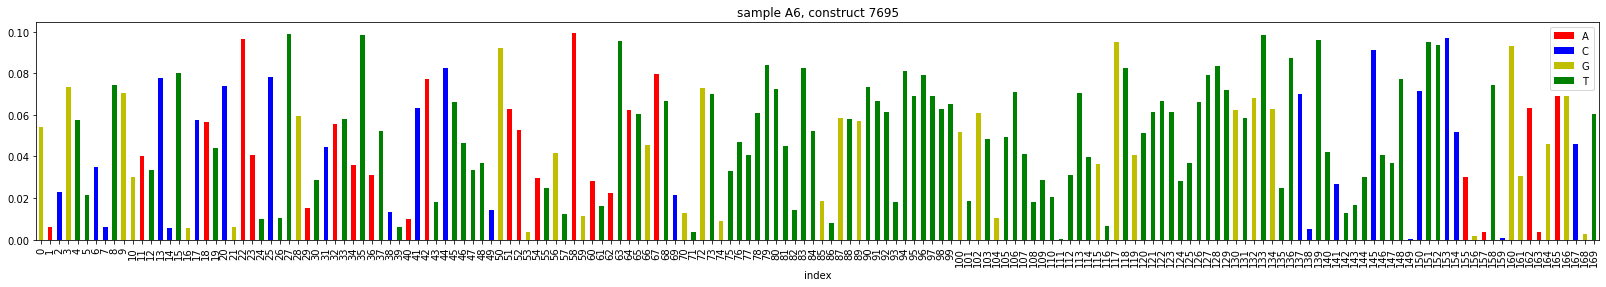

In [6]:
salt.mut_histogram(samp='A6', construct='7695',\
             plot_type='index', figsize=(28,4))

###  Heatmap
Here a heatmap of the minimum base coverage across all samples. Column can be any column that contains a single scalar value.

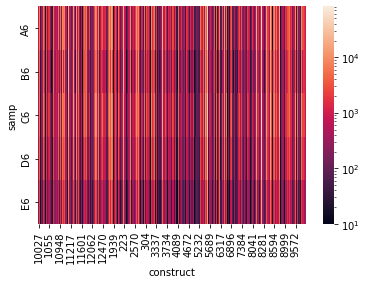

In [11]:
salt.heatmap(column='cov_bases_roi')

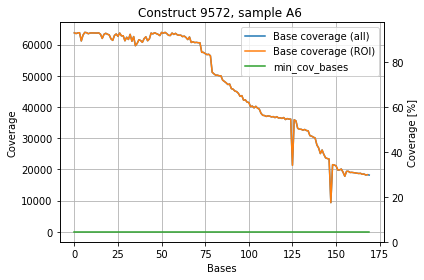

In [12]:
salt.base_coverage(samp='A6', construct='9572')

### Base coverage for all constructs
Plot the base-coverage of the worst-covered base of the Region of Interest, for each construct. 

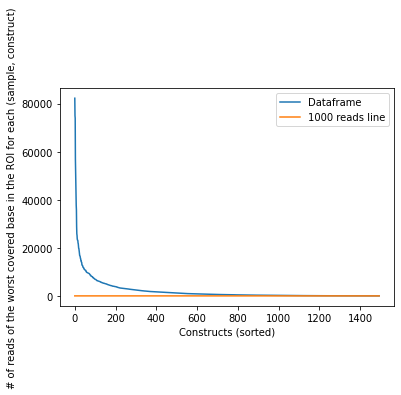

In [8]:
salt.base_coverage_ROI_for_all_constructs()

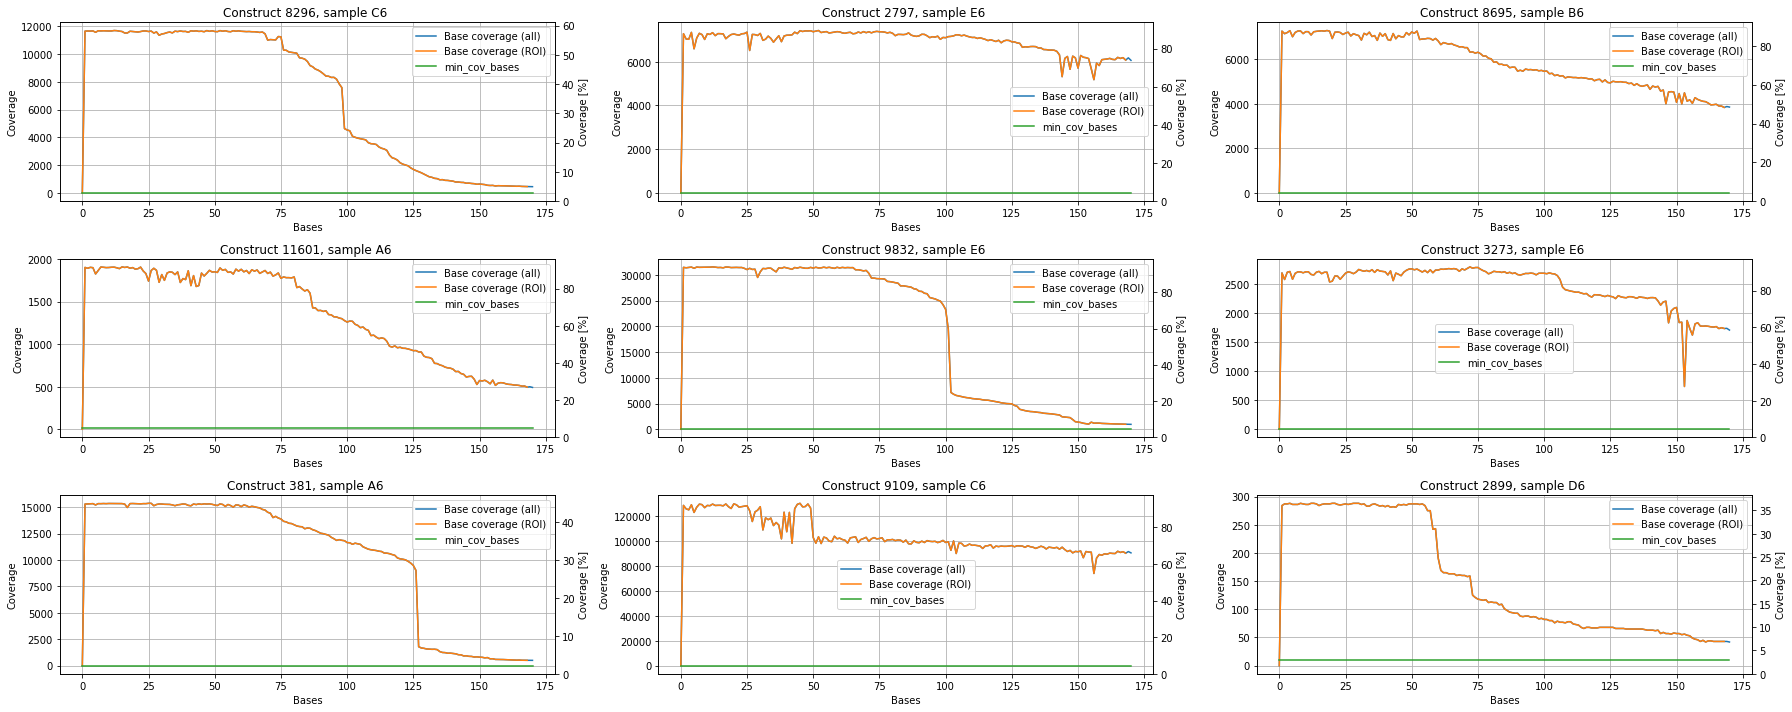

In [6]:
salt.random_9_base_coverage()

### You can load every study from a file using Study.load_studies()

In [13]:
studies = Study.load_studies(cfg['path_to_studies'])
for study in studies.values():
    study.load_df_from_local_files(path_to_data= cfg['path_to_data'], 
                                   min_cov_bases= cfg['min_cov_bases'])

studies['temperature'].df.head()

278 constructs found across all samples for study 180 mM DMS.
288 constructs found across all samples for study 3.1 DMS.
297 constructs found across all samples for study 3.2 DMS.
279 constructs found across all samples for study 60 mM DMS.
325 constructs found across all samples for study PEG1K.
307 constructs found across all samples for study PEG3350.
327 constructs found across all samples for study PEG8K.
277 constructs found across all samples for study RNA titration.
306 constructs found across all samples for study TO_DO_2.
No construct found across all samples for study all samples.
284 constructs found across all samples for study magnesium.
321 constructs found across all samples for study replicates 1.
290 constructs found across all samples for study replicates 2.
300 constructs found across all samples for study salt.
315 constructs found across all samples for study spermidine.
253 constructs found across all samples for study spermine.
278 constructs found across all sa

,samp,construct,sequence,structure,data_type,num_reads,num_aligned,num_of_mutations,mut_bases,info_bases,...,mod_bases_A,mod_bases_C,mod_bases_G,mod_bases_T,ROI_start,ROI_stop,base_pairing_prob,mut_rates,min_cov_bases,cov_bases_roi
0,D7,7695,GACGTTCCTGGATCCTGCATCGAATCTTGATCATATATCTACATCT...,.(()()))).......).(()()))).......).(()())))......,DMS,2766,2305,"[519, 264, 34, 9, 3, 3, 2, 1, 0, 0, 0, 0, 0, 0...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[2222.0, 2223.0, 2224.0, 2224.0, 2227.0, 2227....",...,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",0,169,"[0.7058104408996748, 0.1775968808000472, 0.062...","[0.008590210333754478, 0.05340608744976858, 0....",10,94.0
1,D7,2069,GACGTTCCTGGATCCATTGTATATGTCCTTTTTCTCTTCCTCTTTC...,.(()()))).......).(()()))).......).(()())))......,DMS,9877,9284,"[767, 2065, 139, 87, 64, 82, 26, 23, 6, 3, 0, ...","[0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 1.0, 1.0, 1.0, ...","[9254.0, 9256.0, 9261.0, 9266.0, 9275.0, 9280....",...,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, ...",0,169,"[0.27455844879749647, 0.37946497612642505, 0.9...","[0.009060768553190757, 0.028705541462760345, 0...",10,3832.0
2,D7,381,GACGTTCCTGGATCCATTCGATCCAAACACACCCACACTCACACAC...,.(()()))).......).(()()))).......).(()())))......,DMS,46997,36196,"[4966, 555, 162, 75, 39, 71, 69, 20, 5, 7, 0, ...","[0.0, 0.0, 0.0, 2.0, 0.0, 1.0, 0.0, 3.0, 3.0, ...","[36088.0, 36106.0, 36137.0, 36160.0, 36168.0, ...",...,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 2.0, ...","[0.0, 0.0, 0.0, 1.0, 0.0, 1.0, 0.0, 0.0, 1.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 2.0, 0.0, ...",0,169,"[0.38608017235318337, 0.7153335535560351, 0.09...","[0.05381141654724362, 0.0734972655128593, 0.07...",10,974.0
4,D7,3899,GACGTTCCTGGATCCGCATTCTAAGATTCTTTCTCTTTCTCTTTCT...,.(()()))).......).(()()))).......).(()())))......,DMS,2063,1084,"[54, 30, 2, 2, 4, 7, 3, 7, 20, 14, 0, 0, 0, 0,...","[0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, ...","[1078.0, 1079.0, 1081.0, 1081.0, 1081.0, 1081....",...,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",0,169,"[0.8778608787769598, 0.9269885272813095, 0.836...","[0.07550762480711276, 0.07742654230965434, 0.0...",10,100.0
5,D7,1655,GACGTTCCTGGATCCTTTAGTCTCTTCTTCCTCTTTCTCTTTCTCT...,.(()()))).......).(()()))).......).(()())))......,DMS,23152,2078,"[78, 431, 1254, 18, 26, 7, 16, 16, 5, 0, 0, 0,...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[1809.0, 1809.0, 1809.0, 1809.0, 1809.0, 1809....",...,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",0,169,"[0.8164035378525973, 0.5607776232820354, 0.743...","[0.03559839458574833, 0.09284753946752028, 0.0...",10,96.0


### Studies can be called from the dictionary using their name

In [ ]:
studies['temperature'].mut_histogram(studies['temperature'].samples[0], '9572', 'index')